In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('data/air_data.csv', encoding='utf-8')
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [12]:
# 数据的基本描述，转置后方便查看。
explore = data.describe(percentiles=[], include='all').T
explore['null'] = len(data) - explore['count']
explore = explore[['null', 'max', 'min']]
explore.columns = [u'空值数', u'最大值', u'最小值']


E:\Anaconda\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [20]:
# 移除票价为空的
data = data[data['SUM_YR_1'].notnull() & data['SUM_YR_2'].notnull()]
data.head()

62044

In [22]:
# 设置不同的筛选条件
index1 = data.SUM_YR_1 != 0
index2 = data.SUM_YR_2 != 0
index3 = (data.SEG_KM_SUM == 0) & (data.avg_discount == 0)
data = data[index1 | index2 | index3]
data.to_csv('data_cleaned.csv')

In [24]:
data = data[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'AVG_FLIGHT_COUNT']]
data.head()

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,AVG_FLIGHT_COUNT
0,2014/03/31,2006/11/02,1,210,580717,26.250
1,2014/03/31,2007/02/19,7,140,293678,17.500
2,2014/03/31,2007/02/01,11,135,283712,16.875
3,2014/03/31,2008/08/22,97,23,281336,2.875
4,2014/03/31,2009/04/10,5,152,309928,19.000


In [26]:
# Standard Data
data = pd.read_excel('data/zscoredata.xls')
data = (data - data.mean(axis = 0)) / data.std(axis=0)

In [29]:
data.columns = ['Z'+i for i in data.columns]
data.to_excel('zscoreddata.xls', index=False)

## 模型构建

In [31]:
from sklearn.cluster import KMeans

In [32]:
k = 5
clu_data = pd.read_excel('data/zscoreddata.xls')

In [33]:
kmodel = KMeans(n_clusters=k, n_jobs=4)
kmodel.fit(clu_data)

E:\Anaconda\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
E:\Anaconda\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
E:\Anaconda\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
E:\Anaconda\lib\site-packages\sklearn

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=4, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [34]:
kmodel.cluster_centers_

array([[  2.47744907e-03,   5.90548107e-03,  -2.50946984e-01,
         -2.60764765e-01,   2.06963826e+00],
       [  1.16323327e+00,  -3.78215513e-01,  -8.53881585e-02,
         -9.31466026e-02,  -1.61380556e-01],
       [  4.85359313e-01,  -7.99920536e-01,   2.48341355e+00,
          2.42437846e+00,   3.14364796e-01],
       [ -3.11015394e-01,   1.69158835e+00,  -5.74628664e-01,
         -5.36613147e-01,  -1.84890866e-01],
       [ -7.01209975e-01,  -4.17091449e-01,  -1.57835652e-01,
         -1.56772899e-01,  -2.71666921e-01]])

In [36]:
res = kmodel.labels_

In [38]:
import matplotlib.pyplot as plt

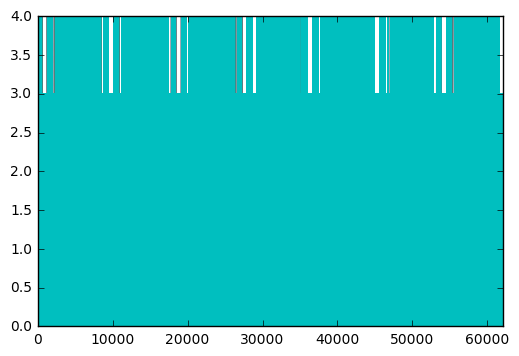

In [44]:
pd.Series(res).plot()
plt.show()